In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.interpolate

In [2]:
from ecoevocrm.consumer_resource_system import *
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg
import ecoevocrm.strain_pool as sp

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

----

In [4]:
def interp_series_plot(interp, t_vals):
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))
    for i in range(L):
        ax.plot(t_vals, interp(t_vals)[i, :]) 
    ax.set_ylim(ymin=min(0, np.min(interp(t_vals))))

----

## Model parameters

### Simulation

In [5]:
T_total = 1e6

### Traits

In [6]:
L = 10

In [7]:
sigma = utils.binary_combinations(L, exclude_all_zeros=True)
sigma = sigma/sigma.sum(axis=1, keepdims=1)

### Costs

In [8]:
chi = 0.5

In [9]:
xi = 0.1

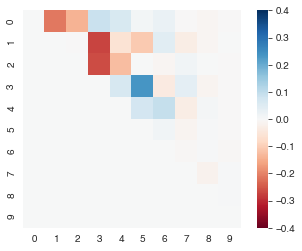

In [10]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid', args={'n_star': 5, 'delta': 1}, triangular=True, diagonal=0)
viz.matrix_plot(J, vmin=-0.4, vmax=0.4)

### Environment

In [11]:
rho_0       = 1
rho_lamda   = 1e-3
rho_k       = 1e-8
rho_etamean = 0
rho_etastd  = 1e-8
rho_dt      = 1e3

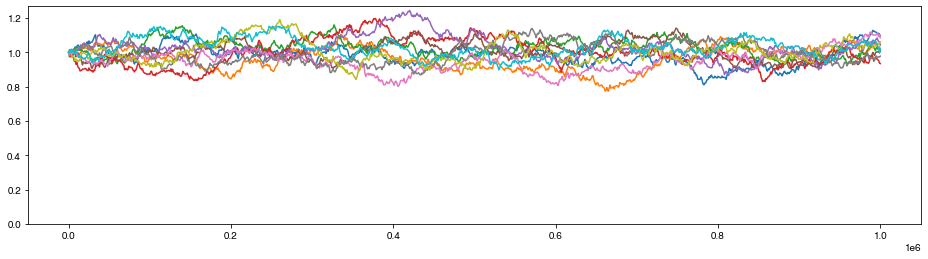

In [12]:
rho_series = utils.brownian_series(T=2*T_total, dt=rho_dt, L=L, lamda=rho_lamda, eta_mean=rho_etamean, eta_std=rho_etastd, k=rho_k, y0=rho_0, v0=0, return_interp=True)
interp_series_plot(rho_series, t_vals=np.arange(0, T_total, step=1))

------

## Run system

In [13]:
system = ConsumerResourceSystem(type_set=TypeSet(sigma=sigma[0], xi=xi, chi=chi, J=J, mu=1e-10, binarize_traits_J_cost_terms=True), 
                                resource_set=ResourceSet(num_resources=L, rho=rho_series), 
                                N_init=1, R_init=1, convergent_lineages=False, max_time_step=1e2)

In [ ]:
system.run(T=T_total)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(system, ax=ax, relative_abundance=True, apply_palette_depth=1, t_max=T_total, log_x_axis=True)